# Pandas are Cool

![Panda](images/panda.jpg)



# But pandas is cool too

![pandas](images/pandas_logo.png)

According to their [website](https://pandas.pydata.org/):

>pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

I didn't know I needed better data structures! What more could I possibly need beyond lists, arrays, dicts, and if I'm really in a jam, a list of dicts containing arrays?? That good data point was at `np.where(sample_list[-5]['calibrated']>1e-4)[0][0]`! Easy to remember and better yet, easy to filter through runs and aggregate group statistics with some simple nested, conditional for loops. :puke emoji:

In this tutorial, I will show you how managing your experimental data will become easy, if not *enjoyable and rewarding* using pandas DataFrames. This tutorial is meant for scientists and engineers with an intermediate level of experience with Python and Numpy. If you know what lists, dicts, and Numpy Arrays are, but feel like *there's gotta be a better way* this should go swimmingly. By the end of this tutorial, you will wonder how you or anybody for that matter works with scientific data without pandas.

# Table of Contents <a name="contents"></a>

## [0. DataFrame Basics](#basics)
> ### [0.0 The Series](#series)
> ### [0.1 .iloc vs .loc](#loc)
> ### [0.2 Indexing DataFrames](#df.loc)
> ### [0.3 Slices vs Copies](#slices)


# 0. DataFrame Basics <a name="basics"></a>

The DataFrame is the central object class in the pandas library (hardcore users will argue it's actually the Series - which we'll see in a moment). The DataFrame is inspired by a data structure of the same name from the R programming language. It is basically a table with rows and columns. Dare I say... it's like an Excel Spreadsheet.

For the tutorial, we'll use the Iris dataset (very standard machine learning tutorial dataset) to demonstrate the basic properties and functionality of a DataFrame. The dataset has the length and width of the [sepals](https://en.m.wikipedia.org/wiki/Sepal) and petals of various Iris species.

![Iris](images/iris.jpg)

### To get started, we can instantiate a DataFrame (df) through pandas' `read_csv` method.

But there are many other ways to ingest data.

In [121]:
# Import pandas
import pandas as pd

# Read the Iris data from the csv file (you can open it in Excel, too)
df = pd.read_csv('data/examples/Iris.csv')

# Return and display the first five rows of the DataFrame
df.head()
#df

sepal length  sepal width  petal length  petal width         iris  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

I displayed the first five rows of the dataset using `df.head()`. Using pandas in a Notebook environment allows you to view slices of your DataFrame like the table above, with nice alternating shading, hover-highlighted rows, and scroll bars if your table is bigger than the cell. If I had just called `df` (uncomment the last line to try), it would have tried to show the entire DataFrame, but after a certain number of rows it will abridge the table by hiding the middle rows. I'll use `.head()` almost every time I display something to avoid cluttering the notebook with massive table views.

The first thing you probably noticed is that we have four columns that are complete garbage. This must have happened while converting from .xls to .csv, and I probably could have fixed it in the raw file, but this kind of stuff comes up all the time and you'll quickly learn that **cleaning data is easier in pandas**. In other words, never mess with raw data again.

## 0.0 The Series <a name="series"></a>
[Back to TOC](#contents)

We'll deal with the garbage columns eventually. DataFrames have rows and columns. To access columns, use square brackets with the column name in quotes. This returns what's called a `Series`, because each column in a DataFrame is stored as a Series.

In [122]:
df['sepal length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, Length: 150, dtype: float64

`df['sepal length']` returns the sepal length column, which is a Series object. **Series have an index (the left column), values (the right column), a name ('sepal length') and a datatype (float64)** among other attributes.

In [124]:
df['sepal length'].name

'sepal length'

In [123]:
df['sepal length'].index

RangeIndex(start=0, stop=150, step=1)

 *You can use tab-completion as you're typing column names to spell them out faster* 

In [55]:
df['sepal length'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

Hey, that's a Numpy Array! The values of a Series are stored as an Array under the hood, so Series tend to respond well to typical Array methods:

In [126]:
df['sepal length'].shape

(150,)

## 0.1 `.iloc` vs. `.loc` <a name='loc'></a>
[Back to TOC](#contents)

There are two ways to slice Series and DataFrames. In pandas they are called `.loc` and `.iloc`.

`.iloc` functions exactly like Numpy indexing: 0-indexed, and you can pass ranges and lists of integers. You can also forego typing the `.iloc` and just go straight to regular brackets, like Numpy.

In [76]:
df['sepal length'].iloc[:3]

0    5.1
1    4.9
2    4.7
Name: sepal length, dtype: float64

In [78]:
df['sepal length'][:3]

0    5.1
1    4.9
2    4.7
Name: sepal length, dtype: float64

In [79]:
df['sepal length'].iloc[[0,2,-1]]

0      5.1
2      4.7
149    5.9
Name: sepal length, dtype: float64

Note the double brackets there because we passed a list.

`.loc` uses the Index to find values. Since the current Index is just the integers 0-149, there won't be much of a distinction here, except that `.loc` is inclusive (will include the last element in a range).

In [127]:
df['sepal length'].loc[:3]

0    5.1
1    4.9
2    4.7
3    4.6
Name: sepal length, dtype: float64

In [128]:
df['sepal length'].loc[[0,2,149]]

0      5.1
2      4.7
149    5.9
Name: sepal length, dtype: float64

Note that with `.loc` we can't pass `-1` like we did with `.iloc`.

### `.loc` is useful for at least three reasons:
* The Index labels stay with their values, even if we re-order things
* The Index can be almost anything (ints, strings, Dates...) and labels do not have to be unique
* Any column can be set as the index (more on this later)

Let's say that I want to sort my data by sepal length, but I still want to know where each entry was originally. That behavior is built into the Index.

In [129]:
sorted_lengths = df['sepal length'].sort_values()
sorted_lengths.head()

13    4.3
42    4.4
38    4.4
8     4.4
41    4.5
Name: sepal length, dtype: float64

We sorted the sepal length column with `.sort_values()` (ascending by default). Since `.head()` is equivalent to `.iloc[:5]`, we get the first five entries (five lowest sepal lengths), but their Index still shows their original values

In [130]:
sorted_lengths.iloc[:3]

13    4.3
42    4.4
38    4.4
Name: sepal length, dtype: float64

In [131]:
sorted_lengths.loc[:3]

13    4.3
42    4.4
38    4.4
8     4.4
41    4.5
22    4.6
3     4.6
Name: sepal length, dtype: float64

This starts to illustrate the difference between `.iloc` and `.loc`. In this case, `.loc` keeps giving back values until it reaches `3` *in the Index*, which was luckily pretty early.

## 0.2 Indexing DataFrames <a name="df.loc"></a>

[Back to TOC](#contents)

We can apply the same indexing to the full DataFrame, but now we can operate in two dimensions.

In [132]:
df.iloc[:3]

sepal length  sepal width  petal length  petal width         iris  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN

In [133]:
df.sort_values(by='sepal length').loc[:3]

sepal length  sepal width  petal length  petal width         iris  \
13           4.3          3.0           1.1          0.1  Iris-setosa   
42           4.4          3.2           1.3          0.2  Iris-setosa   
38           4.4          3.0           1.3          0.2  Iris-setosa   
8            4.4          2.9           1.4          0.2  Iris-setosa   
41           4.5          2.3           1.3          0.3  Iris-setosa   
22           4.6          3.6           1.0          0.2  Iris-setosa   
3            4.6          3.1           1.5          0.2  Iris-setosa   

    Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
13         NaN         NaN         NaN         NaN  
42         NaN         NaN         NaN         NaN  
38         NaN         NaN         NaN         NaN  
8          NaN         NaN         NaN         NaN  
41         NaN         NaN         NaN         NaN  
22         NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN

### In DataFrames, `.loc` and `.iloc` can be used to index rows *and* columns
* With `.iloc`, you can only pass integers
* With `.loc`, you have to pass Index labels for rows, and a column name (or list of column names) for columns
* If you don't use `.loc` or `.iloc`, pandas will interpret what you put in the brackets - if it's an integer it will treat it as `.iloc`, but if it's a column name it will give back the column(s)

In [138]:
df.iloc[:3,:2]

sepal length  sepal width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2

In [139]:
df.loc[:2, ['sepal length', 'sepal width']]

sepal length  sepal width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2

In [140]:
df[:3]

sepal length  sepal width  petal length  petal width         iris  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN

So, to get back a clean DataFrame without the Unnamed columns, we can just pass the names of the desired columns into square brackets.

### We can get all of a DataFrame's columns with the `df.columns` attribute.

In [141]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'iris',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

A `str` method can help us filter out the Unnamed columns - more about those [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [142]:
df.columns.str.contains('Unnamed')

array([False, False, False, False, False,  True,  True,  True,  True])

In [104]:
real_columns = df.columns[ ~df.columns.str.contains('Unnamed') ]
real_columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'iris'], dtype='object')

In [106]:
df[real_columns].head()

sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Note that `df[real_columns]` acts exactly like `df.loc[:, real_columns]`

So that gives us our desired columns. Or at least, it gives us a **view** of our desired columns.

One final note: *yet another way* to return a column is to pass its name as an attribute of your DataFrame:

In [143]:
df.iris.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object

The column name cannot have spaces, and cannot overlap with the names of any other DataFrame methods or attributes. This is a handy way to reduce typing, but I find that it makes code a little less readable. Up to you when to use it.

### To review: here are 3 ways I can think of to access the sepal width of the 3rd entry

Can you think of 3 more?

In [144]:
df.loc[3,'sepal width']

3.1

In [147]:
df.iloc[3,1]

3.1

In [148]:
df['sepal width'].iloc[3]

3.1

Note that some of these index the DataFrame directly, while some are actually first returning a series, then indexing the series (e.g. `df['sepal width'].loc[3]`). Trust me, these are all useful at some point or another, depending on your column names and the nature of your dataset.

### Common indexing errors

Indexing errors can be frustrating. Here are a few that you'll undoubtedly encounter:

In [150]:
df['sepal width', 'sepal length', 'iris'].head()

KeyError: ('sepal width', 'sepal length', 'iris')

## 0.3 Slices vs. Copies <a name="slices"></a>

[Back to TOC](#contents)



In [47]:
len(df['sepal length'])

150

In [42]:
df['sepal length'][-1]

KeyError: -1

In [35]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'iris',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [18]:
df.columns[0]

'sepal length'

In [19]:
df.columns[-1]

'Unnamed: 8'

We want to remove these "Unnamed" columns from our DataFrame. How might we do that?

An old-school list comprehension would probably work:

In [32]:
[col for col in df.columns if 'Unnamed' in col]

['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

Using pandas' `str` methods (read more [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)), we can also do this:

In [33]:
df.columns.str.contains('Unnamed')

array([False, False, False, False, False,  True,  True,  True,  True])

Here we've used `str.contains` to see which members of `df.columns` contain `'Unnamed'`. Pandas objects are indexable just like Numpy Arrays (they use Arrays under the hood), so we can pass this array of booleans to slice our columns (using square brackets, just like Numpy):

In [34]:
df.columns[df.columns.str.contains('Unnamed')]

Index(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], dtype='object')

Both of these methods give us back the list of 'Unnamed' columns, but we want to cut these columns out of our table. So how do we do that?

### Picking columns

# NSLS-II CMS in situ Dec '18

### Import python libraries

In [6]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# numpy and plotting
import numpy as np
import matplotlib.pyplot as plt

# Data handling
import glob
import os
import pandas as pd

# pyFAI
import pyFAI
import pygix
import fabio
from pygix import plotting as ppl

# Utilities
from nsls_utils_air import *
from peak_fitting import *

# Plotting Defaults (must come after other imports)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True,
                 'xtick.top': True,
                 'xtick.direction': 'in',
                 'ytick.right': True,
                 'ytick.direction': 'in',
                 'font.sans-serif': 'Arial',
                 'font.size': 14,
                 'savefig.dpi': 300,
                 'figure.dpi': 96
                })

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data files and dark spectra files

In [7]:
# nils_dir = "\\\\cfs2e.nist.gov\\63_mml\\642\\users\\saxs8542\data\\NSLS-II CMS data\\2018-Dec\\Nils\\insitu_air"
nils_dir = "/Users/nils/CC/CMS Data/Nils/insitu_air"
sample_names = [os.path.split(p)[1] for p in glob.glob(os.path.join(nils_dir, '*')) if p[-3:]!='lnk']
pd.Series(sample_names)

0            blanks
1             calib
2         calib.csv
3    calib_saxs.csv
4      ds30cn_30_s1
5      ds30cn_30_w1
6               WLI
dtype: object

In [8]:
sample_name = 'ds30cn_30_w1'
fig_folder = os.path.join("/Users/nils/CC/DPP_SEBS/figures/in situ/", sample_name)
os.makedirs(fig_folder, exist_ok=True)
waxs_dir = os.path.join(nils_dir, sample_name, 'maxs')
waxs_files = glob.glob(os.path.join(waxs_dir, '*.tiff'))
print(waxs_files[0])

/Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn_30_w1/maxs/ds30cn_30_w1_92.8s_th0.130_0.10s_994723_000000_maxs.tiff


In [9]:
blank_files = glob.glob(os.path.join(nils_dir, 'blanks', '*.tiff'))
dfb = build_master_table(blank_files)
dfb.sample(4)

tiff        sample      t  \
39  /Users/nils/CC/CMS Data/Nils/insitu_air/blanks...       test_si  751.6   
33  /Users/nils/CC/CMS Data/Nils/insitu_air/blanks...       test_si  280.7   
45  /Users/nils/CC/CMS Data/Nils/insitu_air/blanks...  test_si_pos1  217.6   
11  /Users/nils/CC/CMS Data/Nils/insitu_air/blanks...   ahmad_blank  736.9   

    theta  exp_time   stamp  mode  
39   0.15       1.0  994044  maxs  
33   0.05      10.0  994032  maxs  
45   0.15       1.0  994041  maxs  
11   0.12      30.0  993629  saxs

## Master dataframe for data files

In [10]:
### build_master_table does a bunch of filename parsing in the background
dfw = build_master_table(waxs_files)
dfw.tail()

tiff  burst  exp_time  mode  \
905  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
906  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
907  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
908  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
909  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   

                sample   stamp      t  theta  
905  ds30cn_30_w1_pos2  994725  163.8   0.05  
906  ds30cn_30_w1_pos2  994727  194.8   0.08  
907  ds30cn_30_w1_pos2  994729  225.8   0.10  
908  ds30cn_30_w1_pos2  994731  256.8   0.12  
909  ds30cn_30_w1_pos2  994733  287.8   0.15

In [11]:
df_mov = dfw.loc[~dfw['burst'].isna()].copy().sort_values('burst').reset_index()
df_mov.tail()

index                                               tiff  burst  \
895    895  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  895.0   
896    896  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  896.0   
897    897  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  897.0   
898    898  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  898.0   
899    899  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  899.0   

     exp_time  mode        sample   stamp     t  theta  
895       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13  
896       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13  
897       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13  
898       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13  
899       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13

<IPython.core.display.Javascript object>


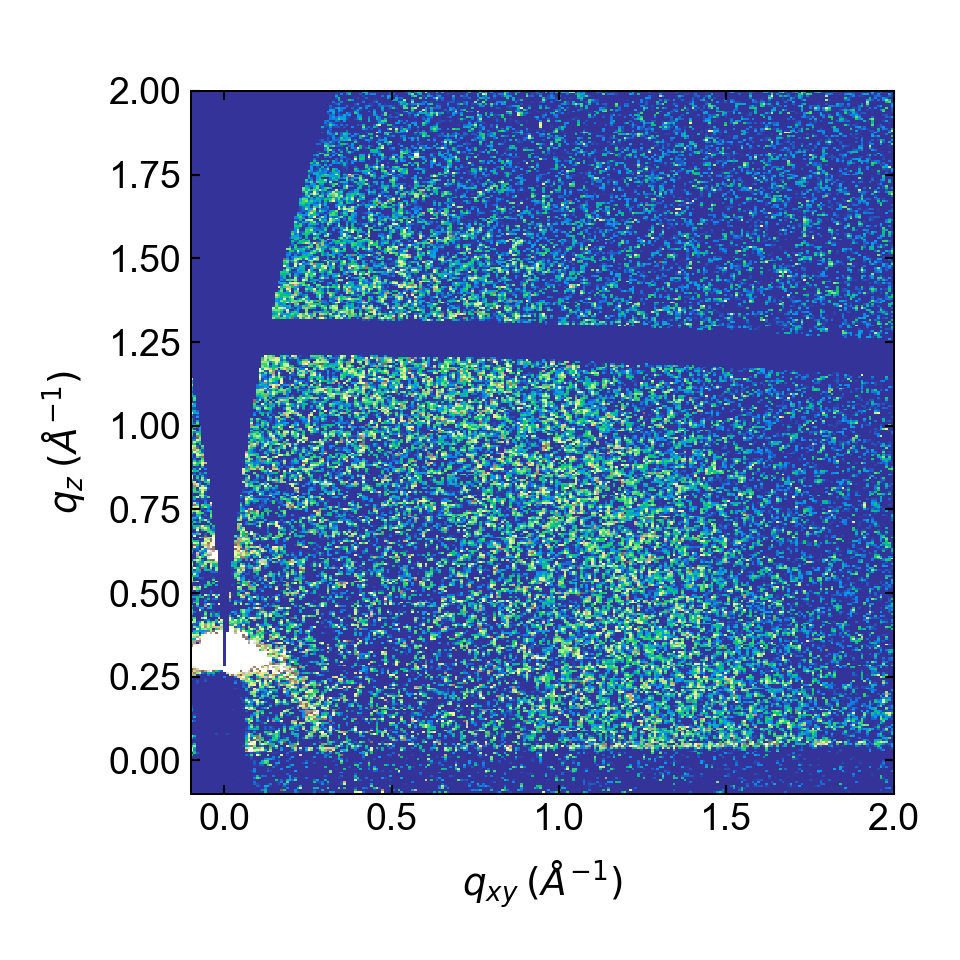

/anaconda/envs/pygix/lib/python3.6/site-packages/pygix-0.1.4a0-py3.6.egg/pygix/plotting.py:346: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif clim == 'auto':


In [12]:
%matplotlib notebook
samp = 800
show_sample(dfw, samp, dark=get_blank(dfb, dfw, samp), log=False)
plt.savefig(os.path.join(fig_folder,'{}_{}.png'.format(sample_name, samp)))

## Test peak fitting on out-of-plane sector

<IPython.core.display.Javascript object>


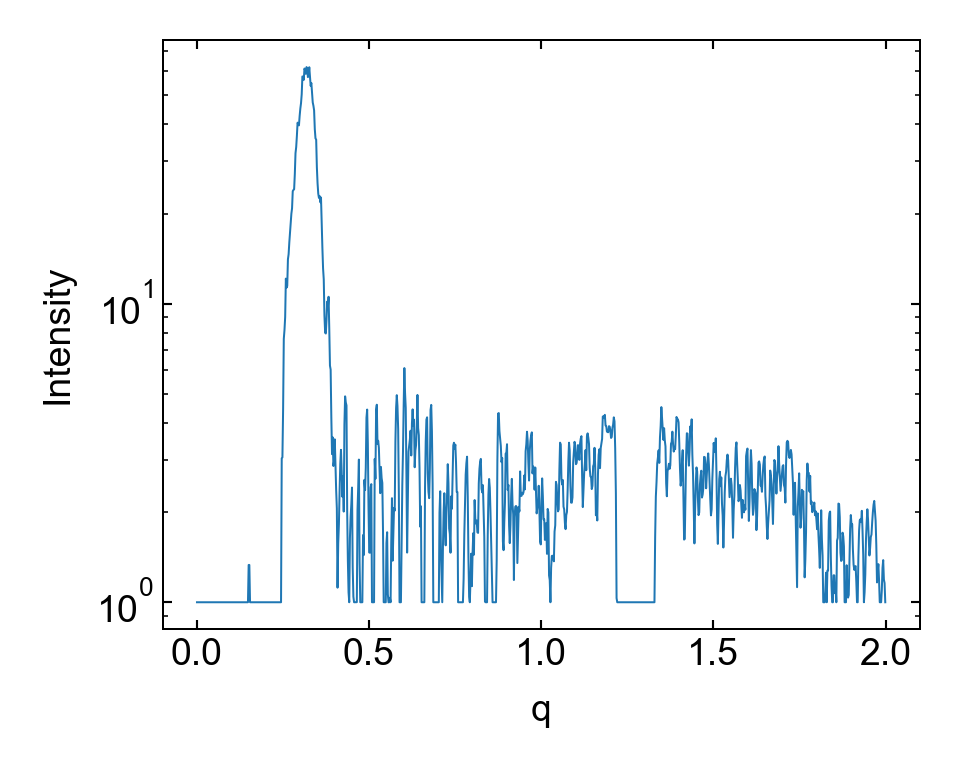

In [13]:
samp = 800
ii, q = get_sector(dfw, samp, -8, chi_width=6, dark=get_blank(dfb, dfw, samp))
f, ax = plt.subplots(figsize=(5,4))
ax.semilogy(q, ii)
ax.set_xlabel('q'); ax.set_ylabel('Intensity')
plt.savefig(os.path.join(fig_folder, '{}_{}_oop_cut.png'.format(sample_name, samp)))

In [14]:
dfp = pd.read_csv('dpp_peaks.csv')
# dfp['amplitude_guess']=dfp['amplitude_guess']*10
# dfp['bg']=['lin','lin','lin']
# dfp['set']=[1,2,3]
dfp=dfp.drop(2)
dfp

name  set  center_guess  center_lb  center_ub  sigma_guess  sigma_ub  \
0  p100    1         0.315       0.29       0.34         0.01         1   
1  p200    1         0.619       0.58       0.65         0.01         1   

   amplitude_guess  fit_lb  fit_ub     bg  model  
0               10    0.27     1.1  const  voigt  
1                1    0.27     1.1  const  voigt

<IPython.core.display.Javascript object>


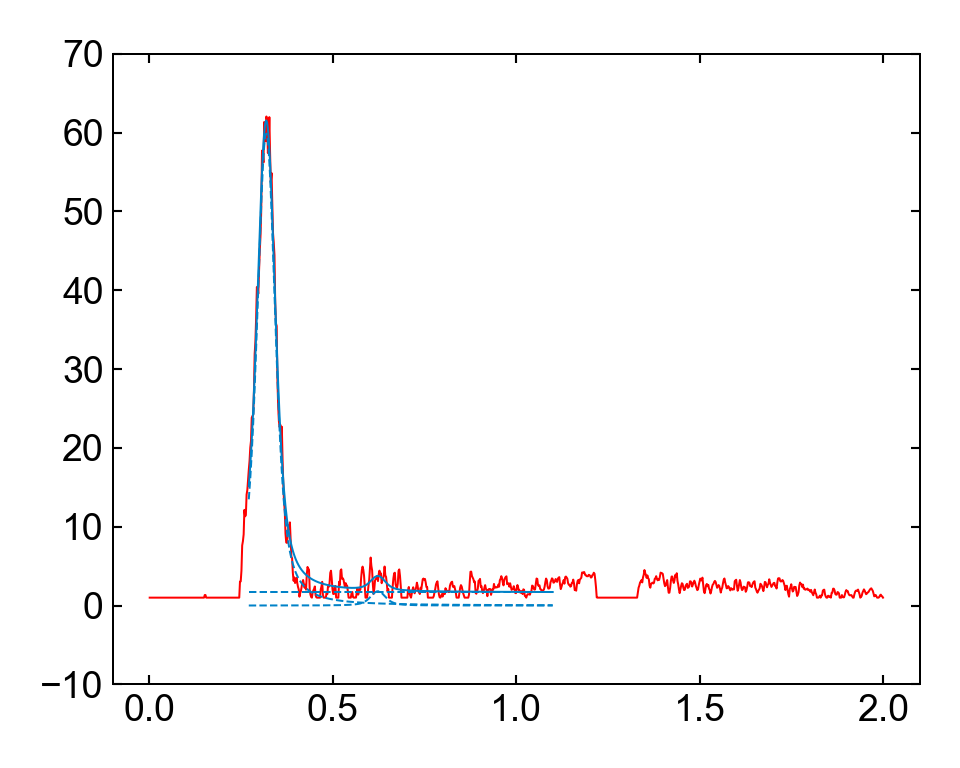

In [15]:
# fix = ['center','sigma','gamma']
fix=[]
df_peaks, fit_dict = fit_peaks(q, ii, dfp, method='leastsq')
plot_peak_fits(q, ii, df_peaks, fit_dict, log_scale=False)
plt.ylim([-10,70])
plt.savefig(os.path.join(fig_folder, '{}_{}_oop_peaks.png'.format(sample_name, samp)))

In [16]:
df_peaks[['name','center','amplitude','height','sigma','gamma','fwhm']]

name    center  amplitude     height     sigma     gamma      fwhm
0  p100  0.318542   4.720270  59.884619  0.016451  0.016451  0.059245
1  p200  0.622889   0.118219   1.810500  0.013628  0.013628  0.049079

## Set up Herman's calculation

<IPython.core.display.Javascript object>


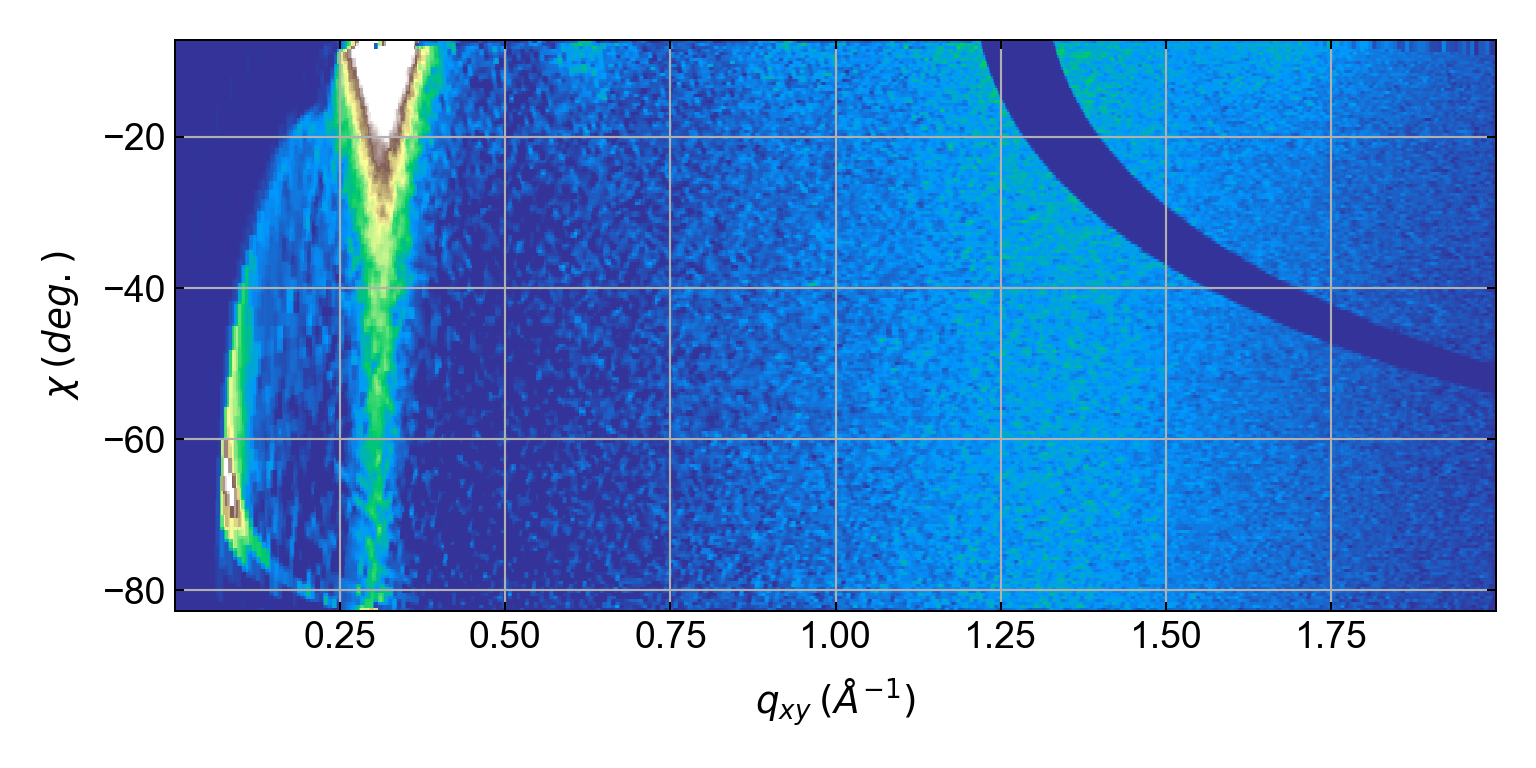

In [17]:
samp=904
intensity, q_abs, chi = get_pole_figure(dfw, samp, chi_range=(-83,-7),
                                        dark=get_blank(dfb, dfw, samp),
                                        q_range=(0,2), npt=(1000,190))
pcolor(intensity, figsize=(8,4),
       extent=[q_abs.min(), q_abs.max(), chi.min(), chi.max()],
       origin='lower', prcs=(0,99.5))
plt.xlabel(r'$q_{xy} \: (\AA^{-1})$')
plt.ylabel(r'$\chi \: (deg.)$')
plt.gca().grid(True)
plt.savefig(os.path.join(fig_folder, '{}_{}_2Dpole.png'.format(sample_name, samp)))

<IPython.core.display.Javascript object>


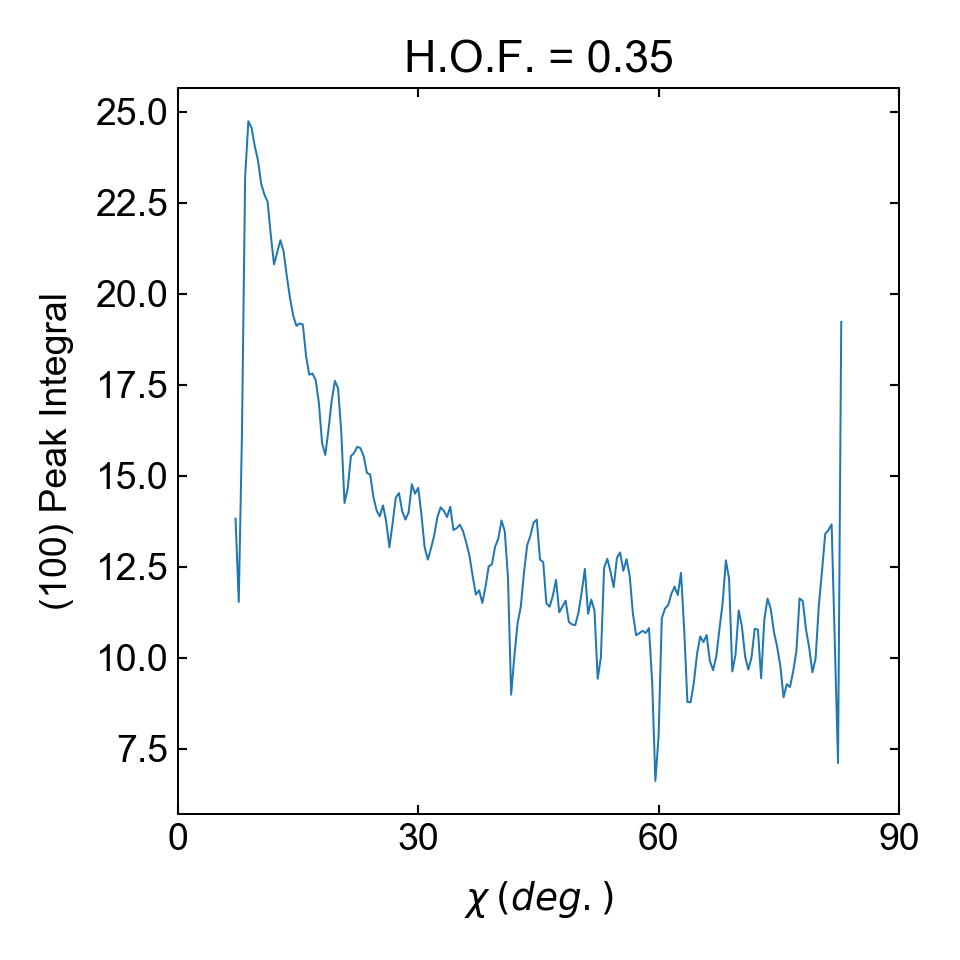

In [18]:
qb = (0.28, 0.33); qbg = [0.46];
cut = bg_corr_slice(intensity, q_abs, qb, qbg)
plt.figure(figsize=(5,5))
plt.plot(-chi, cut * np.abs(np.sin(chi * np.pi / 180)))
plt.xlabel(r'$\chi \: (deg.)$'); plt.ylabel("(100) Peak Integral")
plt.title("H.O.F. = {}".format(np.round(Hermans(cut, chi), decimals=2)))
plt.xticks([0,30,60,90])
plt.savefig(os.path.join(fig_folder, '{}_{}_1Dpole.png'.format(sample_name, samp)))

# Loop over in situ run

In [19]:
op_sect = pd.Series()

for idx,row in df_mov.iterrows():
    print(idx, 'of', len(df_mov))
    ii, q = get_sector(df_mov, idx, -8, chi_width=6, dark=get_blank(dfb, dfw, idx))
#     ii, q = get_sector(df_mov, idx, -8, chi_width=6, dark=None)
    op_sect.loc[idx]=ii

0 of 900


1 of 900
2 of 900


3 of 900
4 of 900


5 of 900
6 of 900


7 of 900
8 of 900


9 of 900
10 of 900


11 of 900


12 of 900


13 of 900


14 of 900


15 of 900


16 of 900


17 of 900


18 of 900
19 of 900


20 of 900
21 of 900


22 of 900
23 of 900


24 of 900
25 of 900


26 of 900
27 of 900


28 of 900
29 of 900


30 of 900
31 of 900


32 of 900
33 of 900


34 of 900


35 of 900
36 of 900


37 of 900
38 of 900


39 of 900


40 of 900
41 of 900


42 of 900
43 of 900


44 of 900
45 of 900


46 of 900


47 of 900
48 of 900


49 of 900


50 of 900
51 of 900


52 of 900


53 of 900
54 of 900


55 of 900
56 of 900


57 of 900
58 of 900


59 of 900
60 of 900


61 of 900
62 of 900


63 of 900
64 of 900


65 of 900
66 of 900


67 of 900
68 of 900


69 of 900
70 of 900


71 of 900


72 of 900
73 of 900


74 of 900
75 of 900


76 of 900
77 of 900


78 of 900
79 of 900


80 of 900
81 of 900


82 of 900


83 of 900


84 of 900


85 of 900


86 of 900


87 of 900


88 of 900


89 of 900
90 of 900


91 of 900


92 of 900


93 of 900
94 of 900


95 of 900


96 of 900


97 of 900


98 of 900


99 of 900


100 of 900
101 of 900


102 of 900


103 of 900
104 of 900


105 of 900


106 of 900


107 of 900


108 of 900


109 of 900


110 of 900
111 of 900


112 of 900


113 of 900


114 of 900
115 of 900


116 of 900
117 of 900


118 of 900
119 of 900


120 of 900
121 of 900


122 of 900
123 of 900


124 of 900
125 of 900


126 of 900
127 of 900


128 of 900
129 of 900


130 of 900
131 of 900


132 of 900
133 of 900


134 of 900
135 of 900


136 of 900
137 of 900


138 of 900
139 of 900


140 of 900
141 of 900


142 of 900
143 of 900


144 of 900
145 of 900


146 of 900
147 of 900


148 of 900
149 of 900


150 of 900
151 of 900


152 of 900
153 of 900


154 of 900
155 of 900


156 of 900
157 of 900


158 of 900
159 of 900


160 of 900
161 of 900


162 of 900
163 of 900


164 of 900
165 of 900


166 of 900
167 of 900


168 of 900
169 of 900


170 of 900
171 of 900


172 of 900
173 of 900


174 of 900
175 of 900


176 of 900
177 of 900


178 of 900
179 of 900


180 of 900
181 of 900


182 of 900
183 of 900


184 of 900
185 of 900


186 of 900
187 of 900


188 of 900
189 of 900


190 of 900
191 of 900


192 of 900
193 of 900


194 of 900
195 of 900


196 of 900
197 of 900


198 of 900
199 of 900


200 of 900
201 of 900


202 of 900
203 of 900


204 of 900
205 of 900


206 of 900
207 of 900


208 of 900
209 of 900


210 of 900
211 of 900


212 of 900
213 of 900


214 of 900
215 of 900


216 of 900
217 of 900


218 of 900
219 of 900


220 of 900
221 of 900


222 of 900
223 of 900


224 of 900
225 of 900


226 of 900
227 of 900


228 of 900
229 of 900


230 of 900
231 of 900


232 of 900
233 of 900


234 of 900
235 of 900


236 of 900
237 of 900


238 of 900
239 of 900


240 of 900
241 of 900


242 of 900
243 of 900


244 of 900
245 of 900


246 of 900
247 of 900


248 of 900
249 of 900


250 of 900
251 of 900


252 of 900
253 of 900


254 of 900
255 of 900


256 of 900
257 of 900


258 of 900


259 of 900


260 of 900


261 of 900


262 of 900
263 of 900


264 of 900
265 of 900


266 of 900
267 of 900


268 of 900
269 of 900


270 of 900
271 of 900


272 of 900
273 of 900


274 of 900
275 of 900


276 of 900
277 of 900


278 of 900
279 of 900


280 of 900
281 of 900


282 of 900
283 of 900


284 of 900
285 of 900


286 of 900
287 of 900


288 of 900
289 of 900


290 of 900
291 of 900


292 of 900
293 of 900


294 of 900
295 of 900


296 of 900
297 of 900


298 of 900
299 of 900


300 of 900
301 of 900


302 of 900
303 of 900


304 of 900
305 of 900


306 of 900
307 of 900


308 of 900
309 of 900


310 of 900
311 of 900


312 of 900
313 of 900


314 of 900
315 of 900


316 of 900
317 of 900


318 of 900
319 of 900


320 of 900
321 of 900


322 of 900
323 of 900


324 of 900
325 of 900


326 of 900
327 of 900


328 of 900
329 of 900


330 of 900
331 of 900


332 of 900
333 of 900


334 of 900
335 of 900


336 of 900
337 of 900


338 of 900
339 of 900


340 of 900
341 of 900


342 of 900
343 of 900


344 of 900
345 of 900


346 of 900
347 of 900


348 of 900
349 of 900


350 of 900
351 of 900


352 of 900


353 of 900


354 of 900
355 of 900


356 of 900
357 of 900


358 of 900
359 of 900


360 of 900
361 of 900


362 of 900
363 of 900


364 of 900
365 of 900


366 of 900
367 of 900


368 of 900
369 of 900


370 of 900
371 of 900


372 of 900
373 of 900


374 of 900
375 of 900


376 of 900
377 of 900


378 of 900
379 of 900


380 of 900
381 of 900


382 of 900
383 of 900


384 of 900
385 of 900


386 of 900
387 of 900


388 of 900
389 of 900


390 of 900
391 of 900


392 of 900
393 of 900


394 of 900
395 of 900


396 of 900
397 of 900


398 of 900
399 of 900


400 of 900


401 of 900
402 of 900


403 of 900
404 of 900


405 of 900
406 of 900


407 of 900
408 of 900


409 of 900
410 of 900


411 of 900
412 of 900


413 of 900
414 of 900


415 of 900
416 of 900


417 of 900
418 of 900


419 of 900
420 of 900


421 of 900
422 of 900


423 of 900
424 of 900


425 of 900
426 of 900


427 of 900
428 of 900


429 of 900
430 of 900


431 of 900


432 of 900
433 of 900


434 of 900
435 of 900


436 of 900
437 of 900


438 of 900
439 of 900


440 of 900
441 of 900


442 of 900
443 of 900


444 of 900
445 of 900


446 of 900
447 of 900


448 of 900
449 of 900


450 of 900
451 of 900


452 of 900
453 of 900


454 of 900
455 of 900


456 of 900
457 of 900


458 of 900
459 of 900


460 of 900
461 of 900


462 of 900
463 of 900


464 of 900
465 of 900


466 of 900


467 of 900
468 of 900


469 of 900
470 of 900


471 of 900
472 of 900


473 of 900
474 of 900


475 of 900
476 of 900


477 of 900
478 of 900


479 of 900


480 of 900


481 of 900
482 of 900


483 of 900
484 of 900


485 of 900
486 of 900


487 of 900


488 of 900
489 of 900


490 of 900
491 of 900


492 of 900
493 of 900


494 of 900


495 of 900


496 of 900


497 of 900
498 of 900


499 of 900
500 of 900


501 of 900


502 of 900
503 of 900


504 of 900
505 of 900


506 of 900
507 of 900


508 of 900


509 of 900
510 of 900


511 of 900
512 of 900


513 of 900
514 of 900


515 of 900
516 of 900


517 of 900
518 of 900


519 of 900


520 of 900
521 of 900


522 of 900
523 of 900


524 of 900
525 of 900


526 of 900
527 of 900


528 of 900
529 of 900


530 of 900
531 of 900


532 of 900
533 of 900


534 of 900
535 of 900


536 of 900
537 of 900


538 of 900


539 of 900
540 of 900


541 of 900
542 of 900


543 of 900
544 of 900


545 of 900
546 of 900


547 of 900
548 of 900


549 of 900
550 of 900


551 of 900
552 of 900


553 of 900
554 of 900


555 of 900
556 of 900


557 of 900
558 of 900


559 of 900
560 of 900


561 of 900
562 of 900


563 of 900
564 of 900


565 of 900
566 of 900


567 of 900
568 of 900


569 of 900
570 of 900


571 of 900


572 of 900


573 of 900
574 of 900


575 of 900
576 of 900


577 of 900
578 of 900


579 of 900
580 of 900


581 of 900
582 of 900


583 of 900
584 of 900


585 of 900
586 of 900


587 of 900
588 of 900


589 of 900
590 of 900


591 of 900
592 of 900


593 of 900
594 of 900


595 of 900
596 of 900


597 of 900
598 of 900


599 of 900
600 of 900


601 of 900
602 of 900


603 of 900
604 of 900


605 of 900
606 of 900


607 of 900
608 of 900


609 of 900
610 of 900


611 of 900
612 of 900


613 of 900
614 of 900


615 of 900
616 of 900


617 of 900
618 of 900


619 of 900
620 of 900


621 of 900
622 of 900


623 of 900
624 of 900


625 of 900
626 of 900


627 of 900
628 of 900


629 of 900


630 of 900
631 of 

900


632 of 900
633 of 900


634 of 900
635 of 900


636 of 900
637 of 900


638 of 900
639 of 900


640 of 900
641 of 900


642 of 900
643 of 900


644 of 900
645 of 900


646 of 900
647 of 900


648 of 900


649 of 900
650 of 900


651 of 900
652 of 900


653 of 900
654 of 900


655 of 900
656 of 900


657 of 900
658 of 900


659 of 900
660 of 900


661 of 900
662 of 900


663 of 900
664 of 900


665 of 900
666 of 900


667 of 900
668 of 900


669 of 900
670 of 900


671 of 900
672 of 900


673 of 900
674 of 900


675 of 900
676 of 900


677 of 900
678 of 900


679 of 900
680 of 900


681 of 900
682 of 900


683 of 900
684 of 900


685 of 900
686 of 900


687 of 900
688 of 900


689 of 900
690 of 900


691 of 900
692 of 900


693 of 900
694 of 900


695 of 900
696 of 900


697 of 900
698 of 900


699 of 900
700 of 900


701 of 900
702 of 900


703 of 900
704 of 900


705 of 900
706 of 900


707 of 900
708 of 900


709 of 900
710 of 900


711 of 900
712 of 900


713 of 900
714 of 900


715 of 900
716 of 900


717 of 900
718 of 900


719 of 900
720 of 900


721 of 900


722 of 900


723 of 900
724 of 900


725 of 900
726 of 900


727 of 900
728 of 900


729 of 900
730 of 900


731 of 900
732 of 900


733 of 900
734 of 900


735 of 900
736 of 900


737 of 900
738 of 900


739 of 900
740 of 900


741 of 900
742 of 900


743 of 900
744 of 900


745 of 900
746 of 900


747 of 900
748 of 900


749 of 900


750 of 900
751 of 900


752 of 900
753 of 900


754 of 900
755 of 900


756 of 900
757 of 900


758 of 900
759 of 900


760 of 900
761 of 900


762 of 900
763 of 900


764 of 900
765 of 900


766 of 900
767 of 900


768 of 900
769 of 900


770 of 900
771 of 900


772 of 900
773 of 900


774 of 900
775 of 900


776 of 900
777 of 900


778 of 900
779 of 900


780 of 900
781 of 900


782 of 900
783 of 900


784 of 900
785 of 900


786 of 900
787 of 900


788 of 900
789 of 900


790 of 900
791 of 900


792 of 900


793 of 900
794 of 900


795 of 900
796 of 900


797 of 900
798 of 900


799 of 900
800 of 900


801 of 900
802 of 900


803 of 900


804 of 900


805 of 900
806 of 900


807 of 900
808 of 900


809 of 900
810 of 900


811 of 900
812 of 900


813 of 900
814 of 900


815 of 900
816 of 900


817 of 900
818 of 900


819 of 900


820 of 900
821 of 900


822 of 900
823 of 900


824 of 900
825 of 900


826 of 900
827 of 900


828 of 900
829 of 900


830 of 900
831 of 900


832 of 900
833 of 900


834 of 900
835 of 900


836 of 900
837 of 900


838 of 900
839 of 900


840 of 900
841 of 900


842 of 900
843 of 900


844 of 900
845 of 900


846 of 900
847 of 900


848 of 900
849 of 900


850 of 900


851 of 900
852 of 900


853 of 900
854 of 900


855 of 900
856 of 900


857 of 900
858 of 900


859 of 900
860 of 900


861 of 900
862 of 900


863 of 900
864 of 900


865 of 900
866 of 900


867 of 900
868 of 900


869 of 900
870 of 900


871 of 900
872 of 900


873 of 900
874 of 900


875 of 900
876 of 900


877 of 900
878 of 900


879 of 900
880 of 900


881 of 900
882 of 900


883 of 900
884 of 900


885 of 900
886 of 900


887 of 900
888 of 900


889 of 900
890 of 900


891 of 900
892 of 900


893 of 900
894 of 900


895 of 900
896 of 900


897 of 900
898 of 900


899 of 900


In [20]:
df_mov['sector'] = op_sect
df_mov.sample(2)

index                                               tiff  burst  \
596    596  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  596.0   
427    427  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...  427.0   

     exp_time  mode        sample   stamp     t  theta  \
596       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13   
427       0.1  maxs  ds30cn_30_w1  994723  92.8   0.13   

                                                sector  
596  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
427  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...

## Plot the line cuts, determine start and stop times

<IPython.core.display.Javascript object>


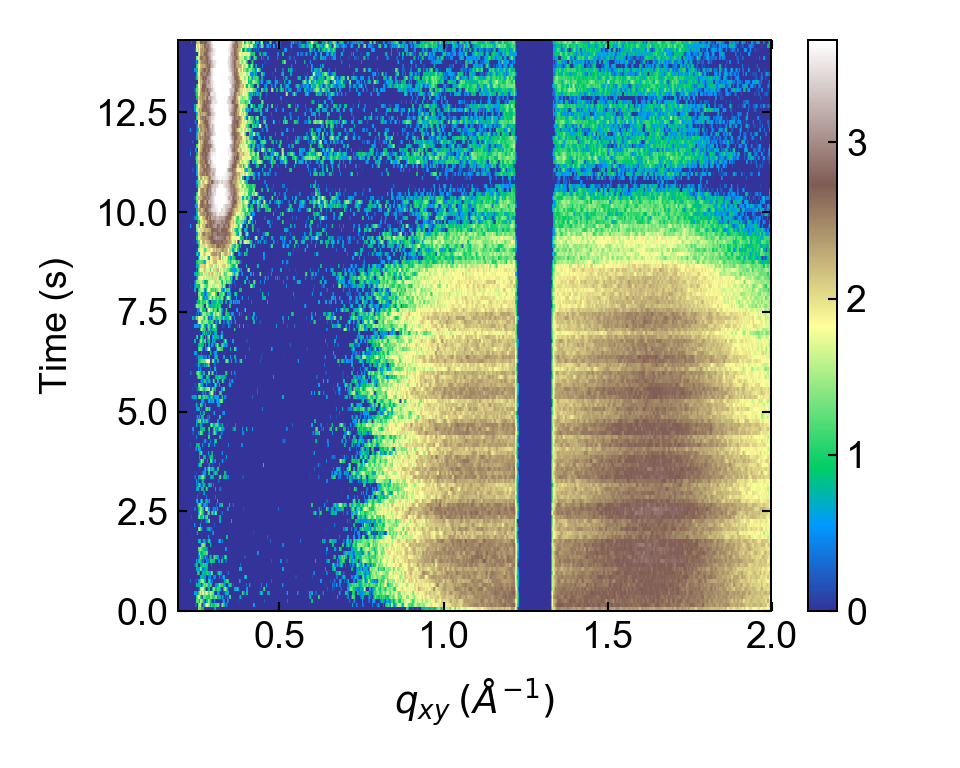

In [21]:
%matplotlib notebook
xray_dt = df_mov['exp_time'].iloc[0]  # 0.1s discretization ... why did I not do 0.2s........
xray_start = 77; xray_stop = 220;
df_mov['time'] = df_mov['burst'].apply(lambda x: (x - xray_start) * xray_dt)

qi = 0.19; qi_ind = np.where(q>qi)[0][0]
extent_xray = [qi, q[-1],
               df_mov['time'].loc[xray_start], df_mov['time'].loc[xray_stop]]

sect_array = np.vstack(df_mov['sector'].iloc[xray_start:xray_stop])[:,qi_ind:]
pcolor(sect_array, extent=extent_xray, origin='lower', log=True)
plt.xlabel(r'$q_{xy} \: (\AA^{-1})$')
plt.ylabel('Time (s)')
plt.colorbar()

## Same for UV

In [22]:
straight_dir = os.path.join(nils_dir, "WLI", sample_name, "straight", "*.txt")
kicked_dir = straight_dir.replace('straight','kicked')
uv_straight = glob.glob(straight_dir)
uv_kicked = glob.glob(kicked_dir)
uv_kicked[0]

'/Users/nils/CC/CMS Data/Nils/insitu_air/WLI/ds30cn_30_w1/kicked/k_00000.txt'

In [23]:
straight0 = np.loadtxt(uv_straight[0], skiprows=17, comments='>')
waves = straight0[:,0]

straight_raw = np.array([np.transpose(np.loadtxt(tt,skiprows=17,comments='>')[:,1]) for tt in uv_straight])
straight_raw.shape

(1785, 2048)

In [24]:
kicked_raw = np.array([np.transpose(np.loadtxt(tt,skiprows=17,comments='>')[:,1]) for tt in uv_kicked])
kicked_raw.shape

(1796, 2048)

In [25]:
from scipy.signal import medfilt
straight_array = np.array([medfilt(row, kernel_size=5) for row in straight_raw])
kicked_array = np.array([medfilt(row, kernel_size=5) for row in kicked_raw])

## Plot Raw Spectrum

<IPython.core.display.Javascript object>


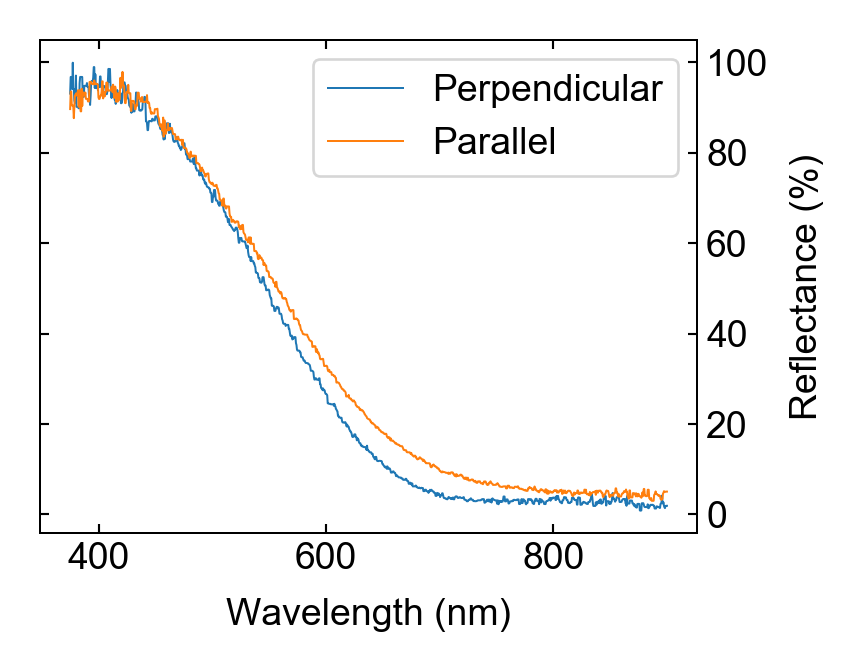

In [26]:
w_start = 375; w_stop = 900
w_start_ind = np.where(waves>w_start)[0][0]
w_stop_ind = np.where(waves>w_stop)[0][0]
waves_crop = waves[w_start_ind:w_stop_ind]

%matplotlib notebook
f = plt.figure(figsize=(4.5,3.5))
f.patch.set_facecolor('w')
f.patch.set_alpha(0)

plt.plot(waves_crop,straight_array[-1,w_start_ind:w_stop_ind],
         waves_crop,kicked_array[-1,w_start_ind:w_stop_ind])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (%)')
ax_uvr = plt.gca()
ax_uvr.yaxis.tick_right()
ax_uvr.yaxis.set_ticks_position("both")
ax_uvr.yaxis.set_label_position("right")
ax_uvr.patch.set_facecolor('white')
ax_uvr.patch.set_alpha(1)

plt.legend(['Perpendicular','Parallel'])

plt.savefig(os.path.join(fig_folder, '{}_UV_example.png'.format(sample_name)))

<IPython.core.display.Javascript object>


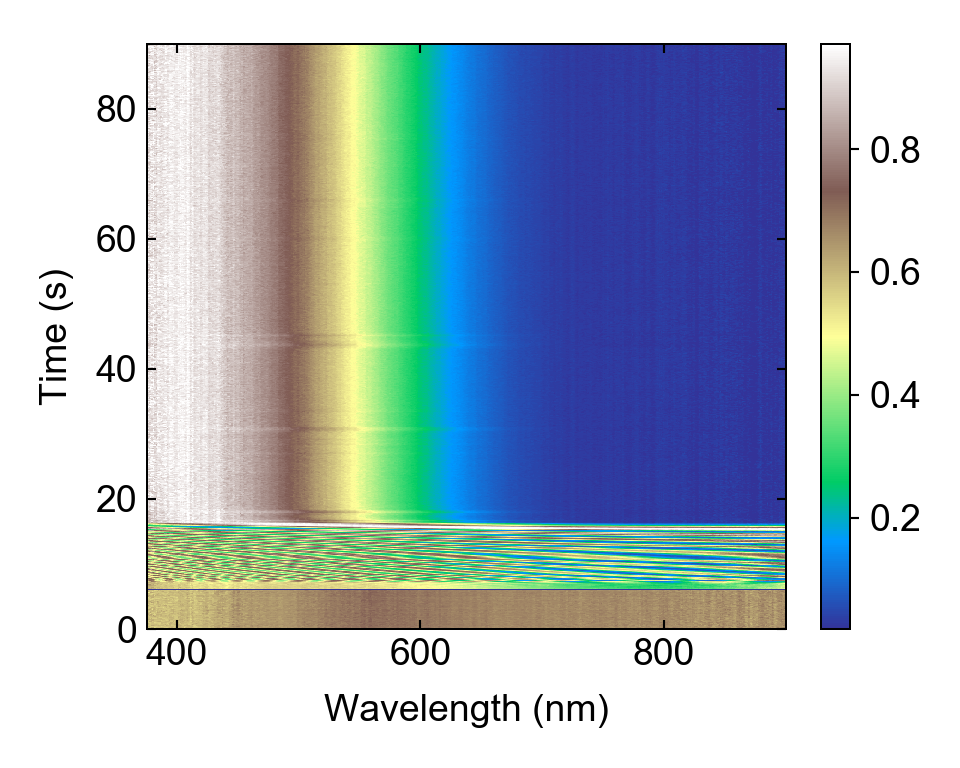

In [27]:
%matplotlib notebook

uv_dt = len(df_mov)*xray_dt / straight_array.shape[0]
spec_start = 0; spec_stop = straight_array.shape[0];
straight_crop = straight_array[spec_start:spec_stop,w_start_ind:w_stop_ind].clip(min=0.1,max=100)/100

extent_wli = [waves[w_start_ind], waves[w_stop_ind], 0, (spec_stop-spec_start)*uv_dt]

pcolor(straight_crop, extent=extent_wli, origin='lower')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (s)')
plt.colorbar(fraction=0.047, pad=0.05).ax.tick_params(axis='y', direction='out')

In [28]:
uv_blade_pass = 6.15
print('set uv_start to: {}'.format(uv_blade_pass / uv_dt))
print('set uv_stop to: {}'.format( (uv_blade_pass + (xray_stop-xray_start)*xray_dt) / uv_dt ))

set uv_start to: 121.97500000000001
set uv_stop to: 405.5916666666667


<IPython.core.display.Javascript object>


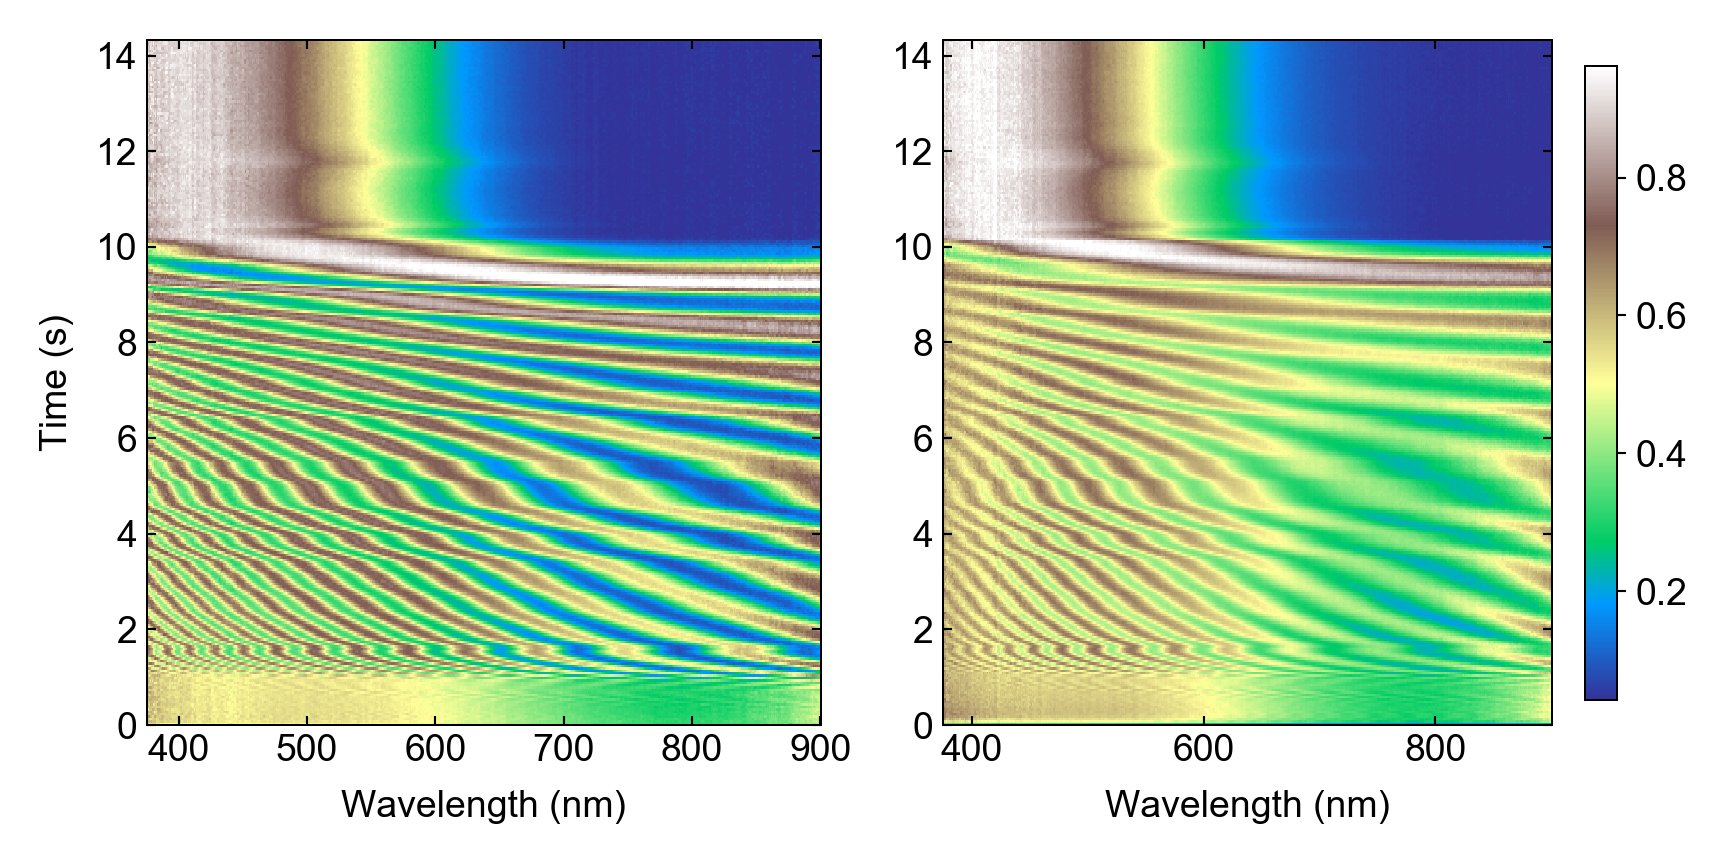

In [29]:
%matplotlib notebook

spec_start = 122; spec_stop = 406;

straight_crop = straight_array[spec_start:spec_stop,w_start_ind:w_stop_ind].clip(min=0.1,max=100)/100
kicked_crop = kicked_array[spec_start:spec_stop,w_start_ind:w_stop_ind].clip(min=0.1,max=100)/100

extent_wli = [waves[w_start_ind], waves[w_stop_ind], 0, (spec_stop-spec_start)*uv_dt]

f1 = plt.figure(figsize=(9,4.5))
ax11 = plt.subplot(121)
pcolor(straight_crop, newfig=False, extent=extent_wli, origin='lower')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (s)')

ax12 = plt.subplot(122, sharey=ax11)
pcolor(kicked_crop, newfig=False, extent=extent_wli, origin='lower')
plt.xlabel('Wavelength (nm)')
plt.colorbar(fraction=0.047, pad=0.05).ax.tick_params(axis='y', direction='out')

plt.savefig(os.path.join(fig_folder, '{}_UV_split_chan.png'.format(sample_name)))

## Get anisotropy and plot

In [30]:
def get_anisotropy(straight_array,kicked_array):
    
    ratio_mat = -np.log(straight_array)/-np.log(kicked_array)
    aniso_mat = (ratio_mat-1)/(ratio_mat+1)
    
    return aniso_mat

/anaconda/envs/pygix/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/envs/pygix/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


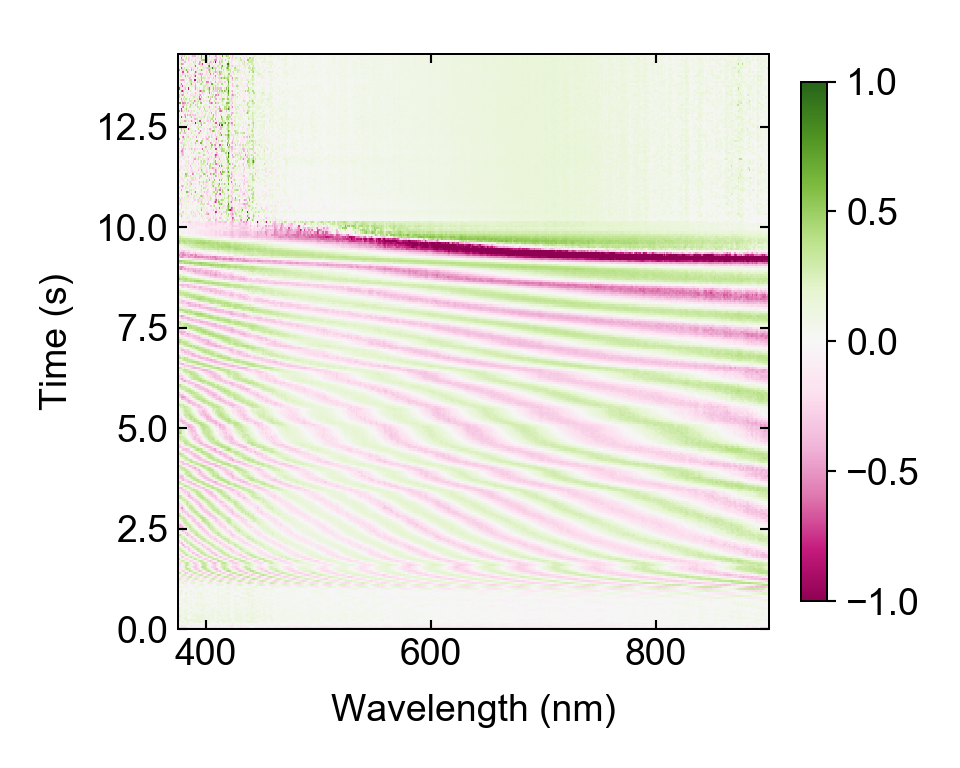

In [31]:
from scipy.ndimage.interpolation import shift
kicked_shift = shift(kicked_array,(0,0))[spec_start:spec_stop,w_start_ind:w_stop_ind].clip(min=0.1,max=100)/100

aniso_mat = get_anisotropy(straight_crop,kicked_shift)

plt.figure(figsize=(5,4))
plt.imshow(aniso_mat,
            origin='lower', aspect='auto',
            vmin=-1, vmax=1,
            interpolation='nearest',
            cmap='PiYG',
            extent=extent_wli)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Time (s)')
plt.colorbar(fraction=0.04, pad=0.05).ax.tick_params(axis='y', direction='out')

<IPython.core.display.Javascript object>


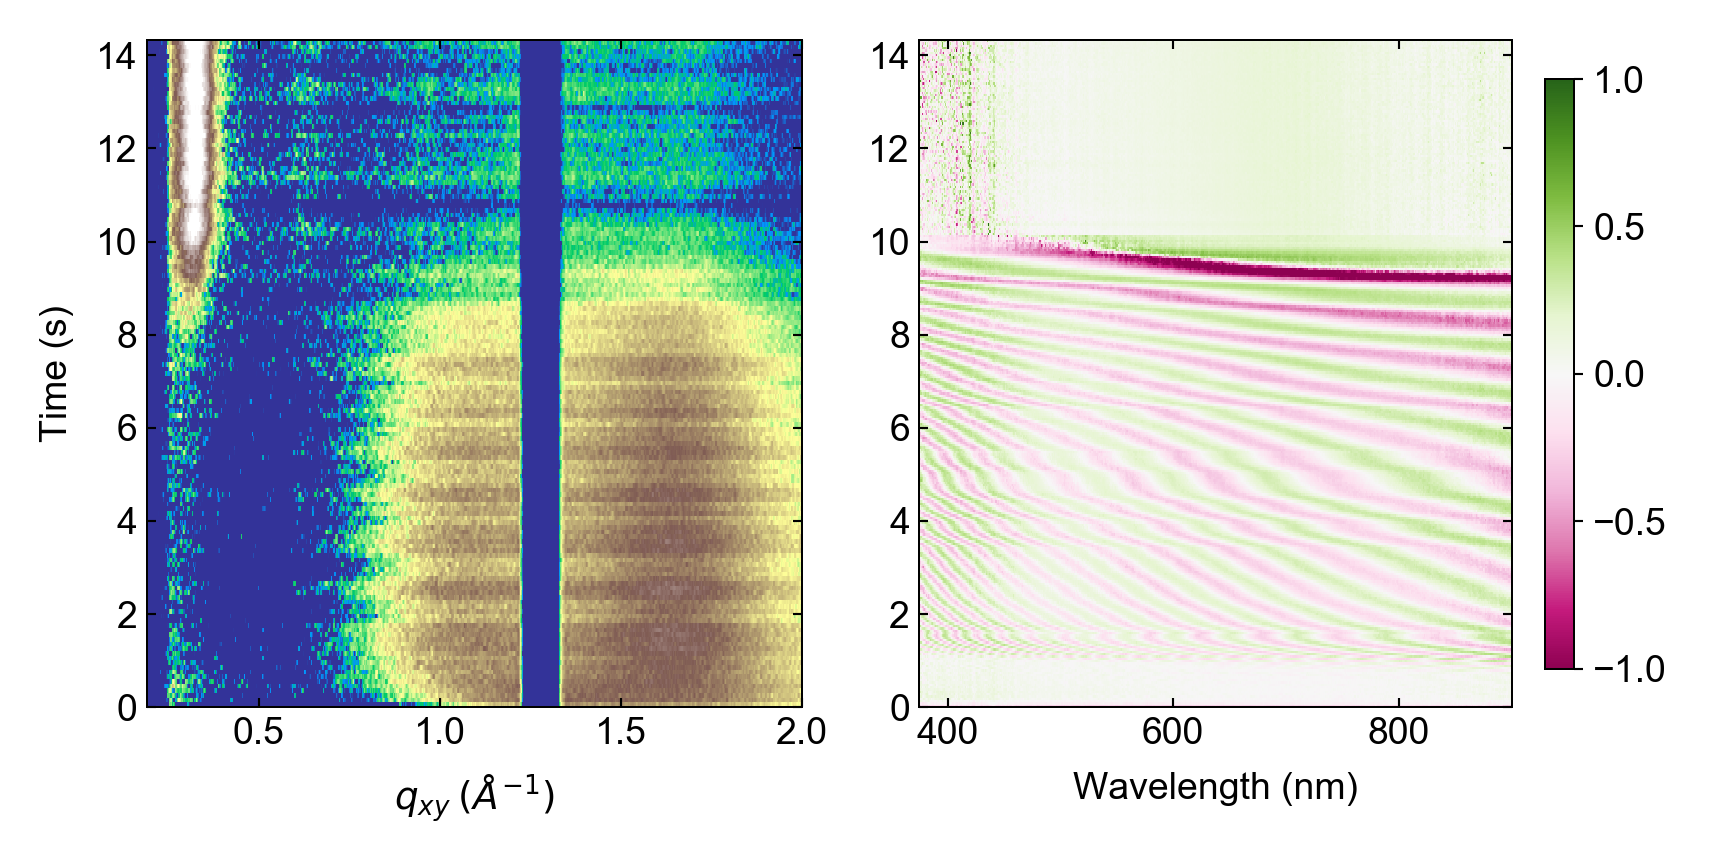

In [32]:
f2 = plt.figure(figsize=(9,4.5))

ax21 = plt.subplot(121)
pcolor(sect_array, newfig=False, extent=extent_xray, origin='lower', log=True)
plt.xlabel(r'$q_{xy} \: (\AA^{-1})$')
plt.ylabel('Time (s)')

ax22 = plt.subplot(122, sharey=ax21)
plt.imshow(aniso_mat,
            origin='lower', aspect='auto',
            vmin=-1, vmax=1,
            interpolation='nearest',
            cmap='PiYG',
            extent=extent_wli)

plt.xlabel('Wavelength (nm)')
plt.colorbar(fraction=0.045, pad=0.05).ax.tick_params(axis='y', direction='out')
plt.savefig(os.path.join(fig_folder, '{}_XUV.png'.format(sample_name)))

## Run analysis over all time points

In [33]:
df_peaks

name  set  center_guess  center_lb  center_ub  sigma_guess  sigma_ub  \
0  p100    1         0.315       0.29       0.34         0.01         1   
1  p200    1         0.619       0.58       0.65         0.01         1   

   amplitude_guess  fit_lb  fit_ub     bg  model   c     sigma    center  \
0               10    0.27     1.1  const  voigt NaN  0.016451  0.318542   
1                1    0.27     1.1  const  voigt NaN  0.013628  0.622889   

   amplitude     gamma      fwhm     height  
0   4.720270  0.016451  0.059245  59.884619  
1   0.118219  0.013628  0.049079   1.810500

In [34]:
from tqdm import tqdm

In [35]:
dfp = pd.read_csv('dpp_peaks.csv')
dfp=dfp.drop(2)
samp = 800
ii, q = get_sector(dfw, samp, -8, chi_width=6, dark=get_blank(dfb, dfw, samp))

for i in tqdm(range(xray_start,xray_stop)):
    df_peaks, fit_dict = fit_peaks(q, df_mov['sector'].loc[i], dfp, method='leastsq')
    df_mov.loc[i,'p100_center'] = df_peaks.loc[0,'center'].copy()
    df_mov.loc[i,'p100_amp'] = df_peaks.loc[0,'amplitude'].copy()
    df_mov.loc[i,'p100_fwhm'] = df_peaks.loc[0,'fwhm'].copy()
    df_mov.loc[i,'p200_center'] = df_peaks.loc[0,'center'].copy()
    df_mov.loc[i,'p200_amp'] = df_peaks.loc[0,'amplitude'].copy()
    df_mov.loc[i,'p200_fwhm'] = df_peaks.loc[0,'fwhm'].copy()
    
    intensity, q_abs, chi = get_pole_figure(df_mov, i, chi_range=(-83,-7),
                                            dark=get_blank(dfb, df_mov, i),
                                            q_range=(0,2), npt=(1000,190))
    qb = (0.28, 0.33); qbg = [0.46];
    cut = bg_corr_slice(intensity, q_abs, qb, qbg)
    df_mov.loc[i,'Hermans'] = Hermans(cut, chi)

 30%|███       | 43/143 [00:10<00:25,  3.99it/s]WARNING:fabio.TiffIO:Data at tag id '65000' is smaller than expected


 61%|██████    | 87/143 [00:27<00:17,  3.19it/s]WARNING:fabio.TiffIO:Data at tag id '65000' is smaller than expected


 92%|█████████▏| 131/143 [00:36<00:03,  3.57it/s]WARNING:fabio.TiffIO:Data at tag id '65000' is smaller than expected


100%|██████████| 143/143 [00:38<00:00,  3.68it/s]


In [36]:
df_mov.loc[xray_stop-1]

index                                                        219
tiff           /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...
burst                                                        219
exp_time                                                     0.1
mode                                                        maxs
sample                                              ds30cn_30_w1
stamp                                                     994723
t                                                           92.8
theta                                                       0.13
sector         [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
time                                                        14.2
p100_center                                             0.320731
p100_amp                                                 4.57402
p100_fwhm                                              0.0625665
p200_center                                             0.320731
p200_amp                 

# Final Plotting and other Viz

<IPython.core.display.Javascript object>


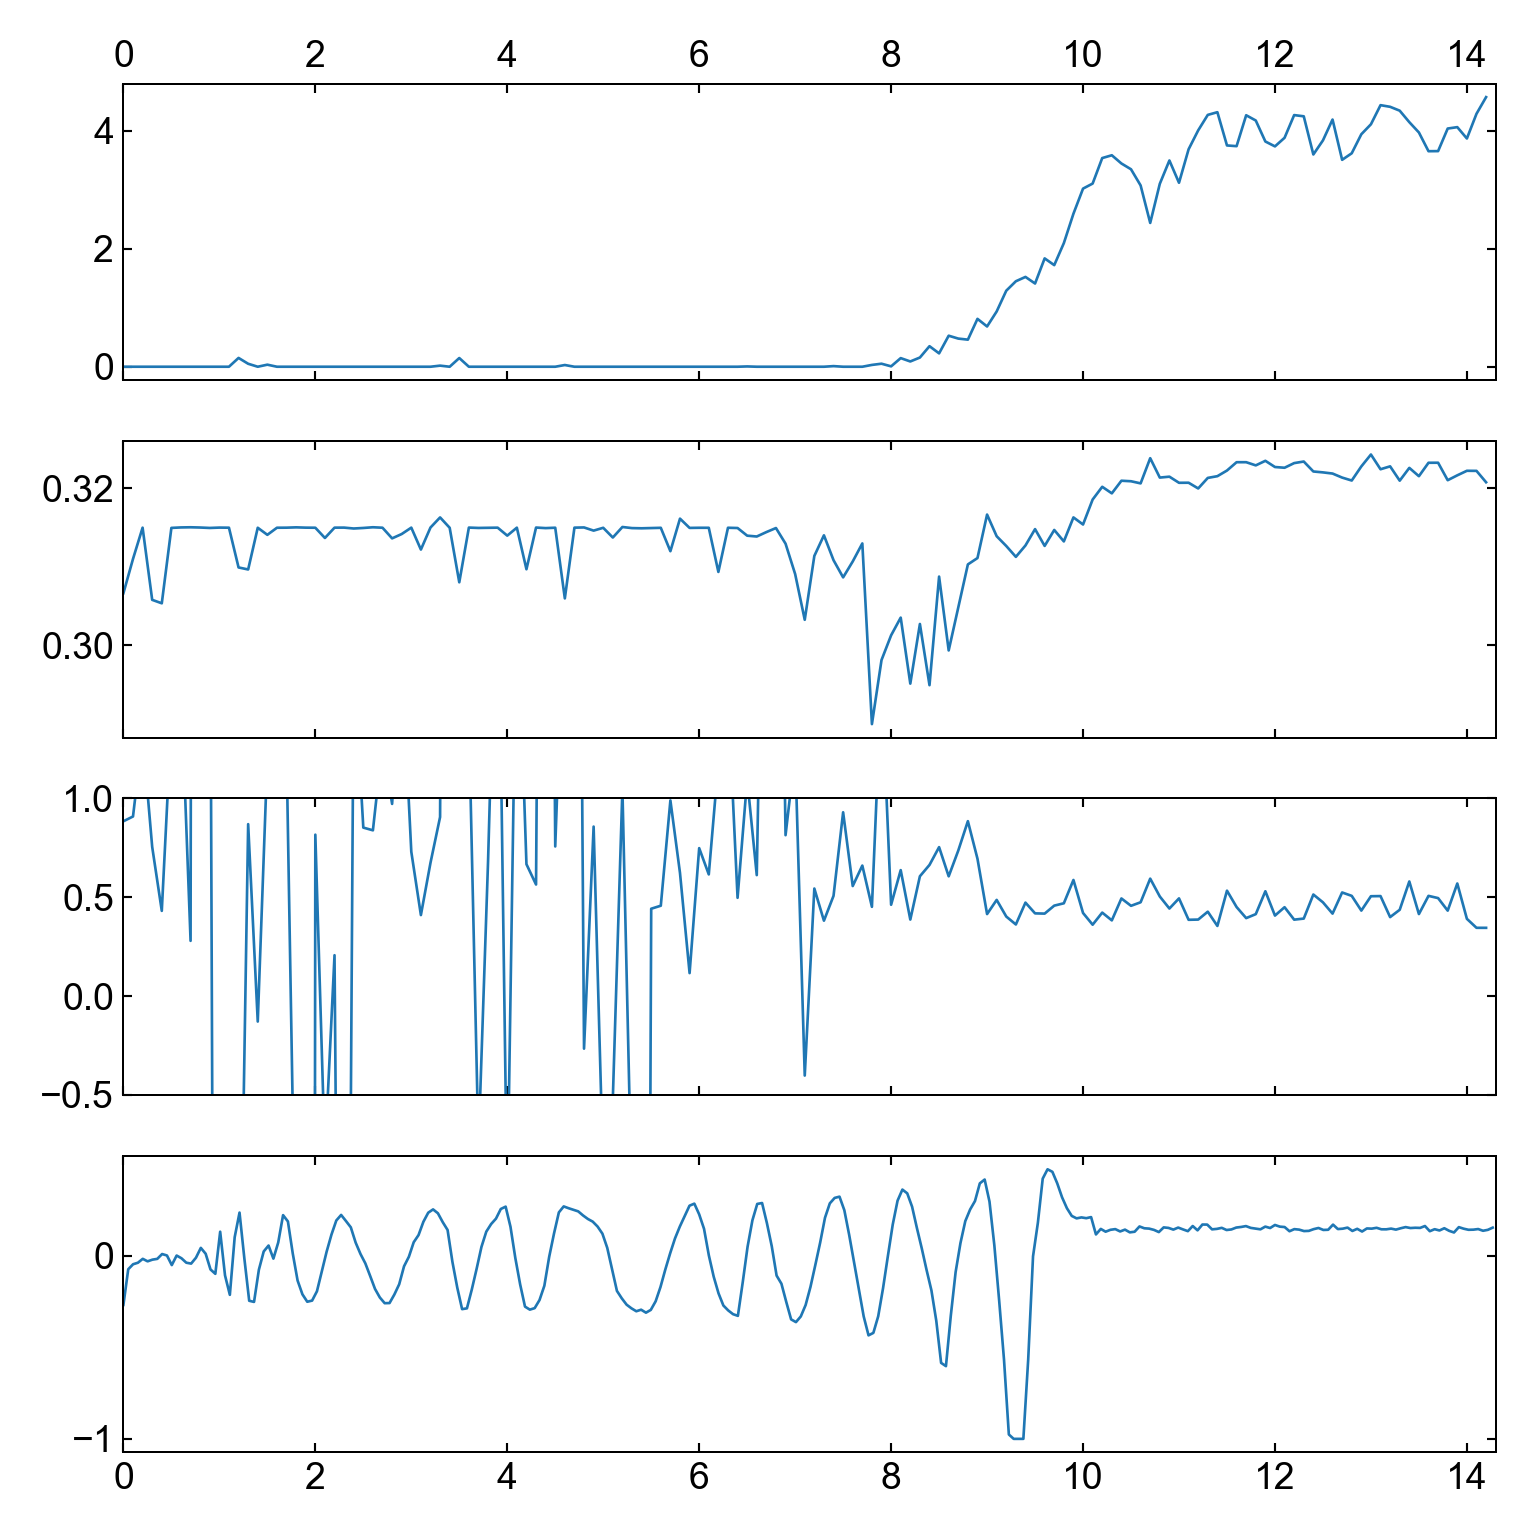

In [37]:
%matplotlib notebook

t_start = df_mov['time'].loc[xray_start]
t_stop = df_mov['time'].loc[xray_stop] #df_mov['time'].max()
linew = 1
what = 'center'
which = 'amp'

gy=4
gx=1

plt.figure(figsize=(8,8))
plt.tight_layout()

plt.subplot(gy,gx,1)
pn1 = 'p100'
plt.plot(df_mov['time'].loc[xray_start:xray_stop],
         df_mov['_'.join([pn1,which])].loc[xray_start:xray_stop],
         linewidth=linew)
# plt.ylabel('{} {} (a.u.)'.format(df_mov.peaks.iloc[0]['name'].loc[pn1], what))
plt.xlim((t_start,t_stop))
plt.tick_params(labelbottom=False)
plt.tick_params(labeltop=True)
# plt.ylim((-0.3,10))


plt.subplot(gy,gx,2)
pn1 = 'p100'
plt.plot(df_mov['time'].loc[xray_start:xray_stop],
         df_mov['_'.join([pn1,what])].loc[xray_start:xray_stop],
         linewidth=linew)
# plt.ylabel('{} {} (a.u.)'.format(df_mov.peaks.iloc[0]['name'].loc[pn2], what))
plt.xlim((t_start,t_stop))
plt.tick_params(labelbottom=False)


plt.subplot(gy,gx,3)
plt.plot(df_mov['time'].loc[xray_start:xray_stop],
         df_mov['Hermans'].loc[xray_start:xray_stop],
         linewidth=linew)
# plt.ylabel('{} {} (a.u.)'.format(df_mov.peaks.iloc[0]['name'].loc[pn2], what))
plt.xlim((t_start,t_stop))
plt.tick_params(labelbottom=False)
plt.ylim([-0.5,1])


# plt.subplot(gy,gx,3)
# pn1 = 'p200'
# plt.plot(df_mov['time'].loc[xray_start:xray_stop],
#          df_mov['_'.join([pn1,which])].loc[xray_start:xray_stop],
#          linewidth=linew)
# # plt.ylabel('(100)/(001) Ratio')
# plt.xlim((t_start,t_stop))
# # plt.gca().set_yticks([0,2,4,6,8])
# # plt.ylim((-0.3,8.3))
# plt.tick_params(labelbottom=False)


# plt.subplot(gy,gx,4)
# pn1 = 'p200'
# plt.plot(df_mov['time'].loc[xray_start:xray_stop],
#          df_mov['_'.join([pn1,what])].loc[xray_start:xray_stop],
#          linewidth=linew)
# # plt.xlabel('Time after blade passage (s)')
# # plt.ylabel("H.O.F. (100)")
# plt.xlim((t_start,t_stop))
# # plt.ylim((-0.4,0.1))
# plt.tick_params(labelbottom=False)


plt.subplot(gy,gx,4)
plt.plot(np.array(range(aniso_mat.shape[0]))*uv_dt,
         aniso_mat[:,np.where(waves_crop>700)[0][0]],
         linewidth=linew)
# plt.plot(df_mov['time'],np.zeros(df_mov['time'].shape),'k--')
# plt.ylabel("UV-Vis Anisotropy")
plt.xlim((t_start,t_stop))
# plt.ylim((-0.3,0.1))


plt.savefig(os.path.join(fig_folder, '{}_all_metrics.png'.format(sample_name)))

# AOI Series Grid

In [45]:
dfw.query('exp_time==10').iloc[:5]

tiff  burst  exp_time  mode  \
900  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
901  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
902  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
903  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   
904  /Users/nils/CC/CMS Data/Nils/insitu_air/ds30cn...    NaN      10.0  maxs   

                sample   stamp      t  theta  
900  ds30cn_30_w1_pos1  994724  147.8   0.05  
901  ds30cn_30_w1_pos1  994726  179.8   0.08  
902  ds30cn_30_w1_pos1  994728  210.8   0.10  
903  ds30cn_30_w1_pos1  994730  241.8   0.12  
904  ds30cn_30_w1_pos1  994732  272.8   0.15

/anaconda/envs/pygix/lib/python3.6/site-packages/pygix-0.1.4a0-py3.6.egg/pygix/plotting.py:346: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif clim == 'auto':
/anaconda/envs/pygix/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


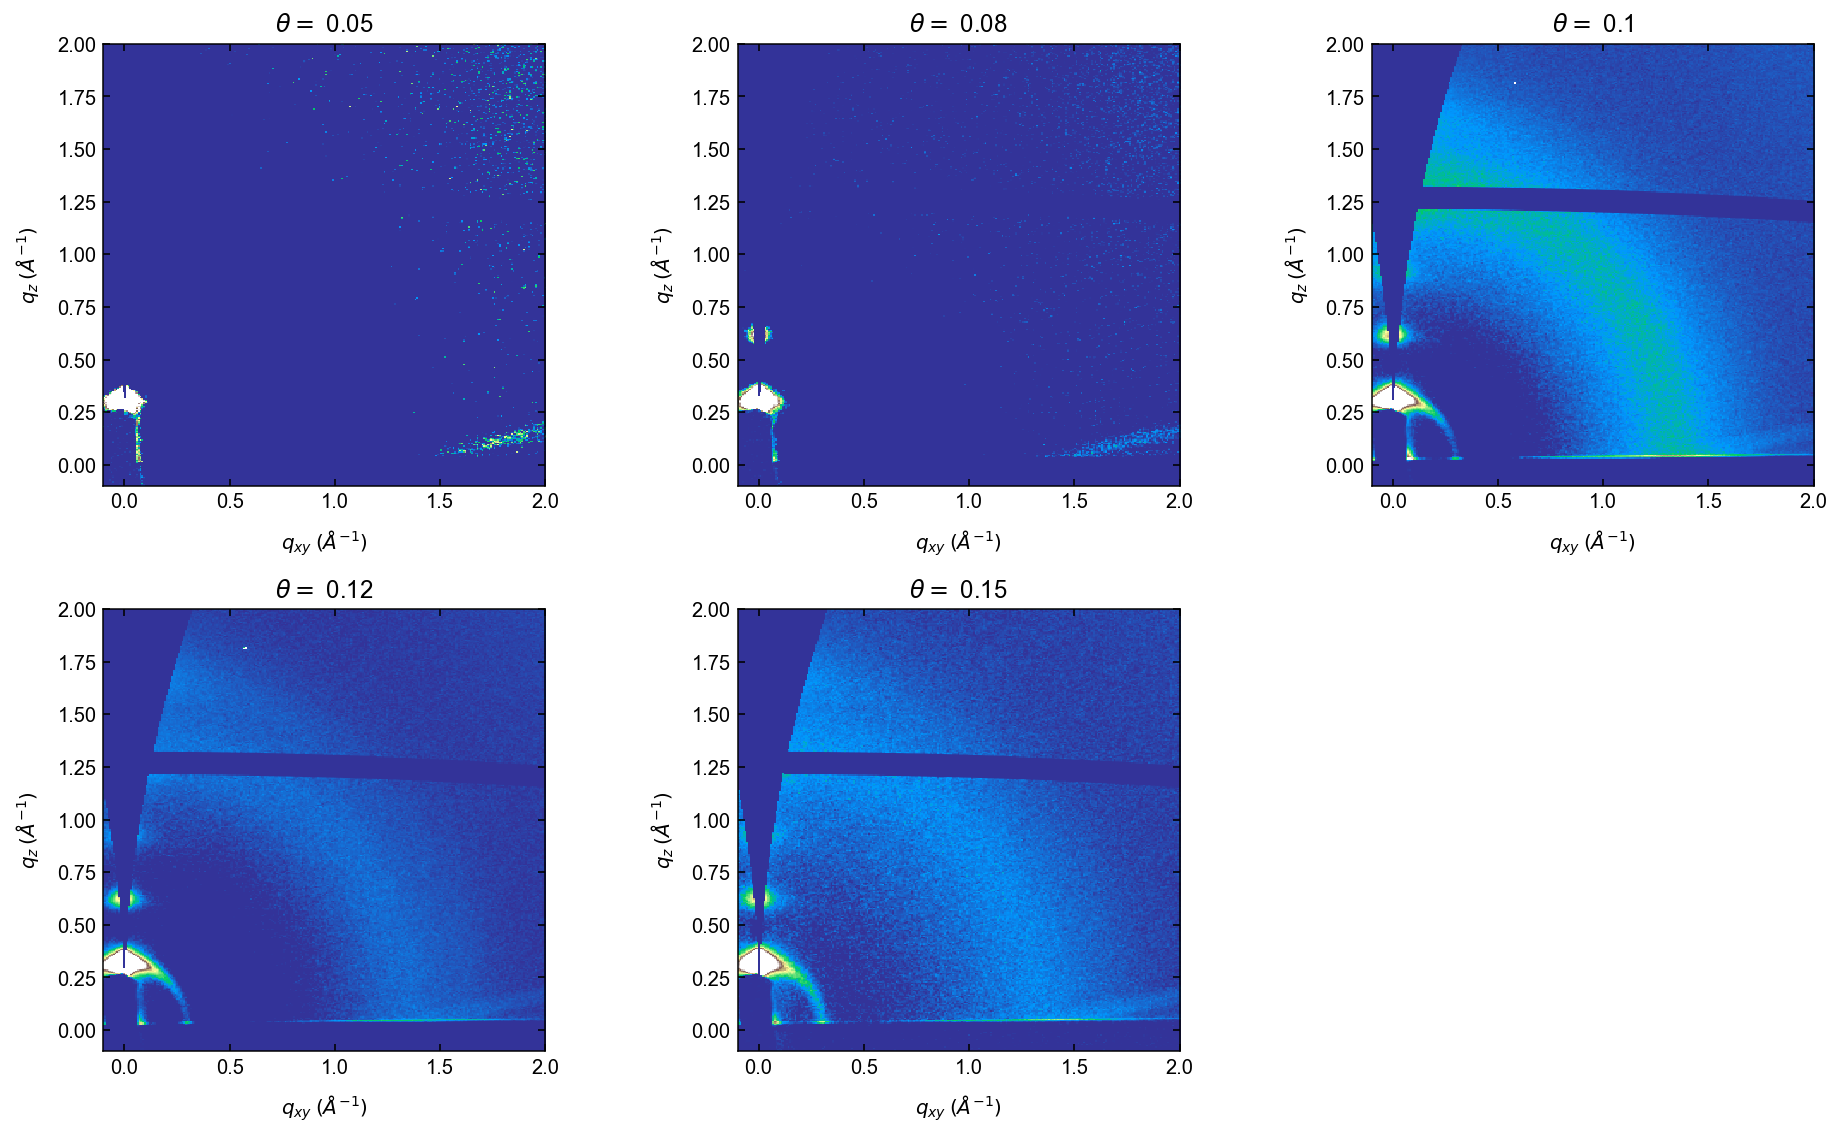

In [53]:
%matplotlib inline
plt.figure(figsize=(14,8))
for ax_ind, (ind, row) in enumerate(dfw.query('exp_time==10').iloc[:5].iterrows()):
    plt.subplot(2,3,ax_ind+1)
    show_sample(dfw, ind, newfig=False, log=False, prcs=(1,99.9), dark=get_blank(dfb, dfw, ind))
    plt.title(r'$\theta =$ {}'.format(row['theta']))
plt.savefig(os.path.join(fig_folder, '{}_AOI_grid.png'.format(sample_name)))

# Movie Time

In [38]:
%matplotlib inline
xray_start_buf = int(xray_start - 2/xray_dt)
sample_name = df_mov['sample'].iloc[0]
waxs_movie_folder = os.path.join(fig_folder,'raw_waxs')
os.makedirs(waxs_movie_folder, exist_ok=True)

for samp,row in df_mov.iloc[xray_start_buf:xray_stop+1].iterrows():
    
    figpath = os.path.join(waxs_movie_folder,
                           '{0:04d}.png'.format(samp-xray_start_buf))
    print(figpath)
   
    f = plt.figure(figsize=(5,5))
    f.patch.set_facecolor('w')
    f.patch.set_alpha(0)
    
    show_sample(df_mov, samp, dark=get_blank(dfb, df_mov, samp),
                newfig=False, log=False)
    
    ax=plt.gca()
    ax.set_facecolor('w')
    ax.set_alpha(0)
    plt.savefig(figpath)
    plt.close(f)

/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0000.png


/anaconda/envs/pygix/lib/python3.6/site-packages/pygix-0.1.4a0-py3.6.egg/pygix/plotting.py:346: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif clim == 'auto':


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0001.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0002.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0003.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0004.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0005.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0006.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0007.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0008.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0009.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0010.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0011.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0012.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0013.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0014.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0015.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0016.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0017.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0018.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0019.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0020.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0021.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0022.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0023.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0024.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0025.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0026.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0027.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0028.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0029.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0030.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0031.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0032.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0033.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0034.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0035.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0036.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0037.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0038.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0039.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0040.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0041.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0042.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0043.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0044.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0045.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0046.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0047.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0048.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0049.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0050.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0051.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0052.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0053.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0054.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0055.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0056.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0057.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0058.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0059.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0060.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0061.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0062.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0063.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0064.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0065.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0066.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0067.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0068.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0069.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0070.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0071.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0072.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0073.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0074.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0075.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0076.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0077.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0078.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0079.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0080.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0081.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0082.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0083.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0084.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0085.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0086.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0087.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0088.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0089.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0090.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0091.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0092.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0093.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0094.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0095.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0096.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0097.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0098.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0099.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0100.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0101.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0102.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0103.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0104.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0105.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0106.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0107.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0108.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0109.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0110.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0111.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0112.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0113.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0114.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0115.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0116.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0117.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0118.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0119.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0120.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0121.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0122.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0123.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0124.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0125.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0126.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0127.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0128.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0129.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0130.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0131.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0132.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0133.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0134.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0135.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0136.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0137.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0138.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0139.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0140.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0141.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0142.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0143.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0144.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0145.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0146.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0147.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0148.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0149.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0150.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0151.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0152.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0153.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0154.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0155.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0156.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0157.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0158.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0159.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0160.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0161.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0162.png


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_waxs/0163.png


In [39]:
figwild = figpath[:-8]+"%04d.png"
movieout = os.path.join(fig_folder, "waxs_movie.mp4")

xray_cmd = """ffmpeg -framerate 10 -i "{}" -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=720:720:force_original_aspect_ratio=decrease,pad=720:720:(ow-iw)/2:(oh-ih)/2" -y "{}" """.format(figwild,movieout)
# Run this to make the movie in command prompt
# print("Paste into cmd:\n")
# print(xray_cmd)
!{xray_cmd}

ffmpeg version N-91024-g293a6e8332-tessus Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 9.1.0 (clang-902.0.39.1)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopus --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay
  libavutil      56. 18.100 / 56. 18.100
  libavcodec     58. 19.101 / 58. 19.101
  libavformat    58. 13.102 / 58. 13.102
  libavdevice    58.  4.100 / 58.  4.100
  libav

In [40]:
%matplotlib inline

sample_name = df_mov['sample'].iloc[0]
uv_movie_folder = os.path.join(fig_folder,'raw_uv')
os.makedirs(uv_movie_folder, exist_ok=True)

spec_start_buf = int(spec_start - 2/uv_dt)
straight_movie = straight_array[:,w_start_ind:w_stop_ind].clip(min=0.1,max=100)
# kicked_shift = shift(kicked_array,(dt_shift.x,0))
kicked_shift = kicked_array
kicked_movie = kicked_shift[:,w_start_ind:w_stop_ind].clip(min=0.1,max=100)

for i in range(spec_start_buf, spec_stop+1):
    
    uvfigpath = os.path.join(uv_movie_folder, 'refl_{0:04d}.png'.format(i-spec_start_buf))
    print(uvfigpath)
    
    f = plt.figure(figsize=(5,5))
    f.patch.set_facecolor('w')
    f.patch.set_alpha(0)
    
    plt.plot(waves_crop,straight_movie[i,:],
             waves_crop,kicked_movie[i,:])
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflectance (%)')
    
    ax_temp = plt.gca()
    ax_temp.set_ylim([0,100])
    ax_temp.set_facecolor('w')
    ax_temp.set_alpha(0)
    
    plt.savefig(uvfigpath, dpi=300, bbox_inches='tight')
    plt.close()

/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0000.png


/anaconda/envs/pygix/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0001.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0002.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0003.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0004.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0005.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0006.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0007.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0008.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0009.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0010.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0011.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0012.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0013.png
/Users/nils/CC/DPP_SEBS/figures/in sit

/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0112.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0113.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0114.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0115.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0116.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0117.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0118.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0119.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0120.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0121.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0122.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0123.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0124.png
/Users/nils/CC/DPP_SEBS/figures/in sit

/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0223.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0224.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0225.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0226.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0227.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0228.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0229.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0230.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0231.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0232.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0233.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0234.png
/Users/nils/CC/DPP_SEBS/figures/in situ/ds30cn_30_w1/raw_uv/refl_0235.png
/Users/nils/CC/DPP_SEBS/figures/in sit

In [41]:
uvfigwild = uvfigpath[:-8]+"%04d.png"
uvmovieout = os.path.join(fig_folder, "uv_movie.mp4")

uv_cmd = """ffmpeg -framerate {} -i "{}" -c:v libx264 -r 30 -pix_fmt yuv420p -vf "scale=720:720:force_original_aspect_ratio=decrease,pad=720:720:(ow-iw)/2:(oh-ih)/2" -y "{}" """.format(1/uv_dt,uvfigwild,uvmovieout)
# Run this to make the movie in command prompt
# print("Paste into cmd:\n")
# print(uv_cmd)
!{uv_cmd}

ffmpeg version N-91024-g293a6e8332-tessus Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 9.1.0 (clang-902.0.39.1)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopus --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay
  libavutil      56. 18.100 / 56. 18.100
  libavcodec     58. 19.101 / 58. 19.101
  libavformat    58. 13.102 / 58. 13.102
  libavdevice    58.  4.100 / 58.  4.100
  libav

In [42]:
composite_out = os.path.join(os.path.split(fig_folder)[0],'{}_movie.mp4'.format(sample_name))

composite_cmd = """
ffmpeg -i "{}" -i "{}" -filter_complex "[0:v][1:v]hstack=inputs=2[v]" -map "[v]" -y "{}"
""".format(movieout,uvmovieout,composite_out)

# print("Paste into cmd:\n")
# print(composite_cmd)

!{composite_cmd}

ffmpeg version N-91024-g293a6e8332-tessus Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 9.1.0 (clang-902.0.39.1)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopus --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-config-flags=--static --disable-ffplay
  libavutil      56. 18.100 / 56. 18.100
  libavcodec     58. 19.101 / 58. 19.101
  libavformat    58. 13.102 / 58. 13.102
  libavdevice    58.  4.100 / 58.  4.100
  libav